In [303]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [304]:
df = pd.read_csv('prosperLoanData.csv')

In [305]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [306]:
df.ScorexChangeAtTimeOfListing.value_counts()

 0.0      1127
-40.0      544
 40.0      529
 80.0      205
-5.0       189
          ... 
-175.0       1
 227.0       1
 191.0       1
 190.0       1
 235.0       1
Name: ScorexChangeAtTimeOfListing, Length: 372, dtype: int64

In [307]:
df.ScorexChangeAtTimeOfListing.describe()

count    18928.000000
mean        -3.223214
std         50.063567
min       -209.000000
25%        -35.000000
50%         -3.000000
75%         25.000000
max        286.000000
Name: ScorexChangeAtTimeOfListing, dtype: float64

In [308]:
df['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

In [310]:
# We have created a function to help assign a value to all the entires with NaN ProsperScore
'''
    Completed - Borrower completed loan repayment on time, hence a high score (low risk) value is assigned.
    Chargedoff - Borrower completed loan repayment before time, hence a higher score (lower risk) value is assigned.
    Defaulted - Borrower did not complete loan repayment, hence lower score (high risk)
    Cancelled - A lower score than Defaulted
'''
def set_prosper_score(entry):
    
    score = entry.ProsperScore
    status = entry.LoanStatus
    
    if (score > 0):
        return score
    else:
        if (status == 'Completed'):
            return 7.0
        elif (status == 'Chargedoff'):
            return 5.0
        elif (status == 'Defaulted'):
            return 5.0
        else:
            return 1.0

In [311]:
df['ProsperScore'] = df.apply(set_prosper_score, axis=1)

In [312]:
df.ProsperScore.isnull().sum()

0

In [319]:
df[['BorrowerRate', 'ProsperScore']].corr()

,BorrowerRate,ProsperScore
BorrowerRate,1.000000,-0.520761
ProsperScore,-0.520761,1.000000


In [320]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


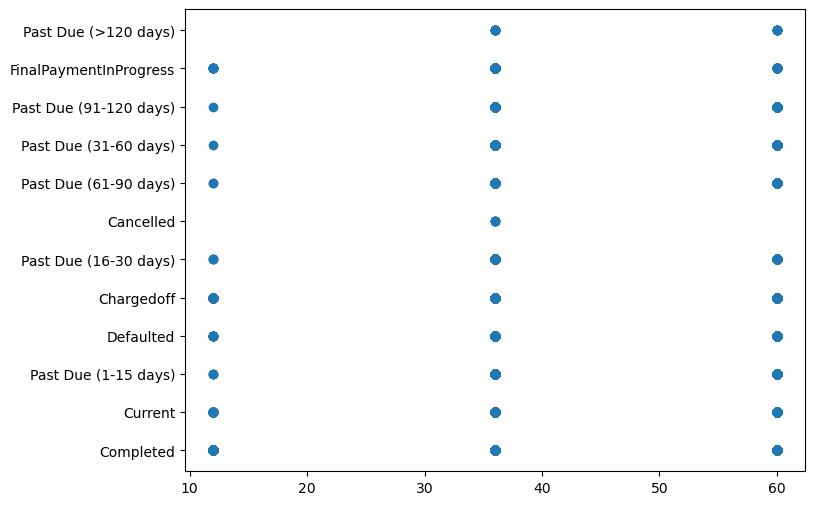

In [350]:
# since x, y, and z have a polynomial relationship with carat, let's see how
# one of them correlates with price.
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'Term', y = 'LoanStatus')

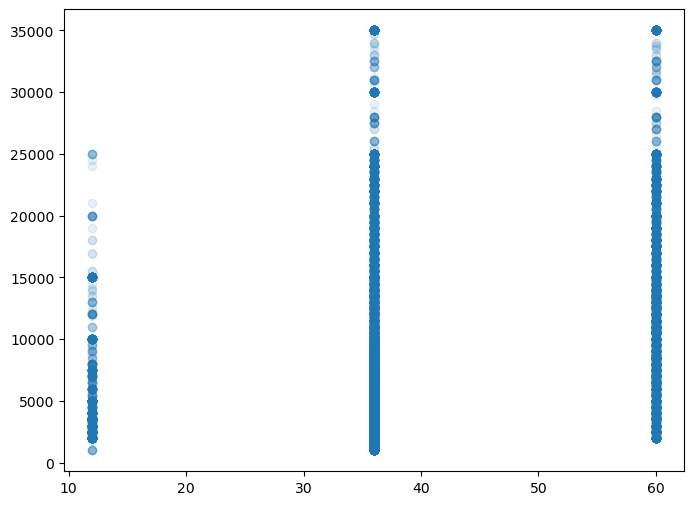

In [333]:
# since x, y, and z have a polynomial relationship with carat, let's see how
# one of them correlates with price.
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'Term', y = 'LoanOriginalAmount', alpha = 1/10)

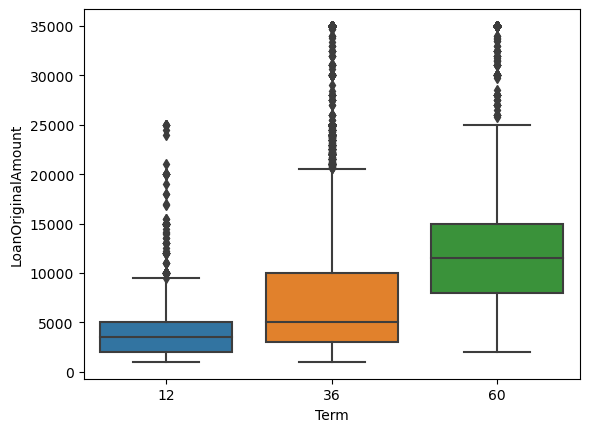

In [377]:
sb.boxplot(data=df, x='Term', y='LoanOriginalAmount');

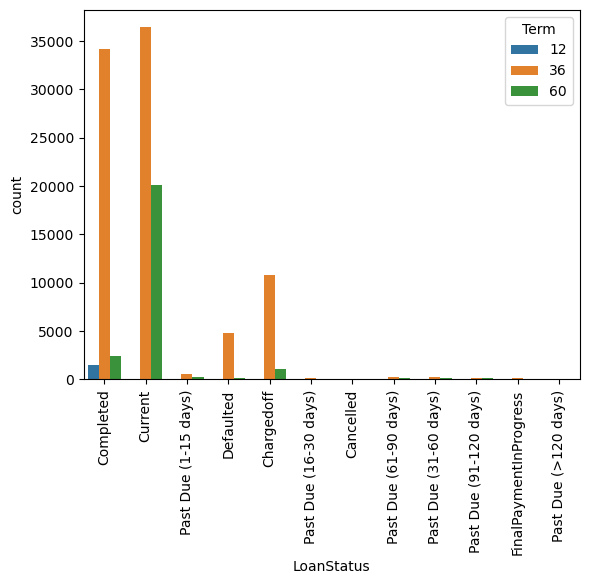

In [341]:
sb.countplot(data=df, x='LoanStatus', hue='Term');
plt.xticks(rotation=90);

In [ ]:
OpenRevolvingMonthlyPayment

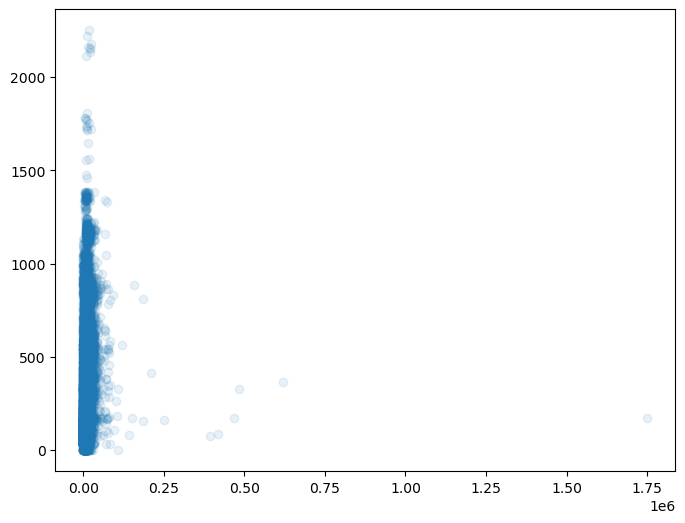

In [345]:
# scatter plot of price vs. carat, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment', alpha = 1/10);

In [348]:
df['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [357]:
counts = df.groupby(['LoanStatus', 'Term']).size()

In [358]:
counts = counts.reset_index(name='count')

In [359]:
counts = counts.pivot(index='LoanStatus', columns = 'Term', values='count')

<AxesSubplot:xlabel='Term', ylabel='LoanStatus'>

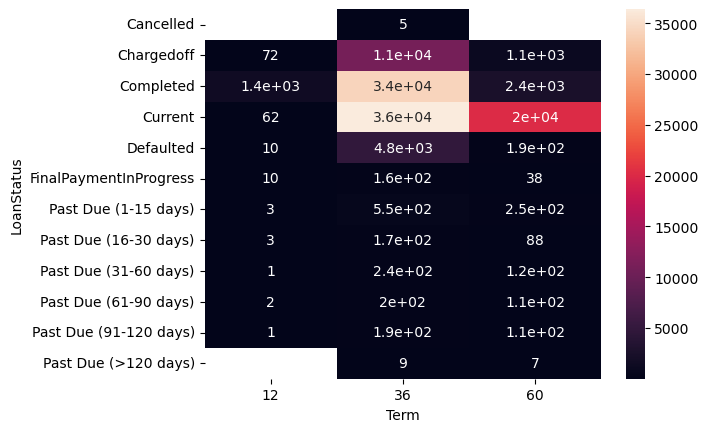

In [363]:
sb.heatmap(counts,  annot=True)

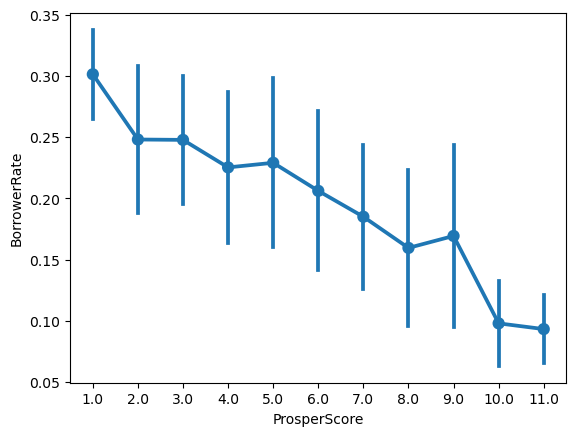

In [367]:
sb.pointplot(data=df, x='ProsperScore', y='BorrowerRate', errorbar='sd');

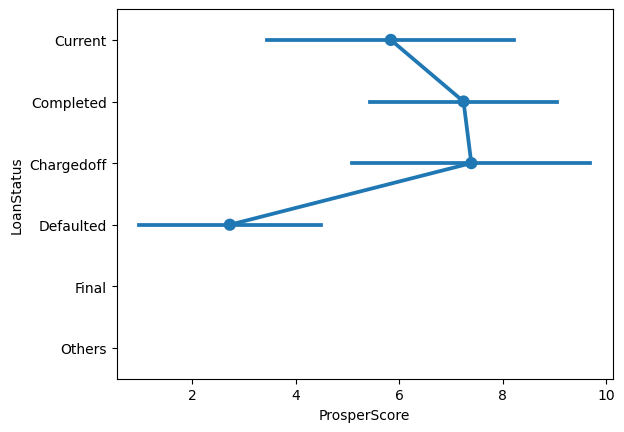

In [374]:
sb.pointplot(data=df, x='ProsperScore', y='LoanStatus', errorbar='sd');

In [368]:
df['LoanStatus'].value_counts().index

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

In [369]:
cat = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Final', 'Others']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=cat)

#Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df['LoanStatus'] = df['LoanStatus'].astype(vclasses);

In [370]:
df['LoanStatus'].value_counts()

Current       56576
Completed     38074
Chargedoff    11992
Defaulted      5018
Final             0
Others            0
Name: LoanStatus, dtype: int64

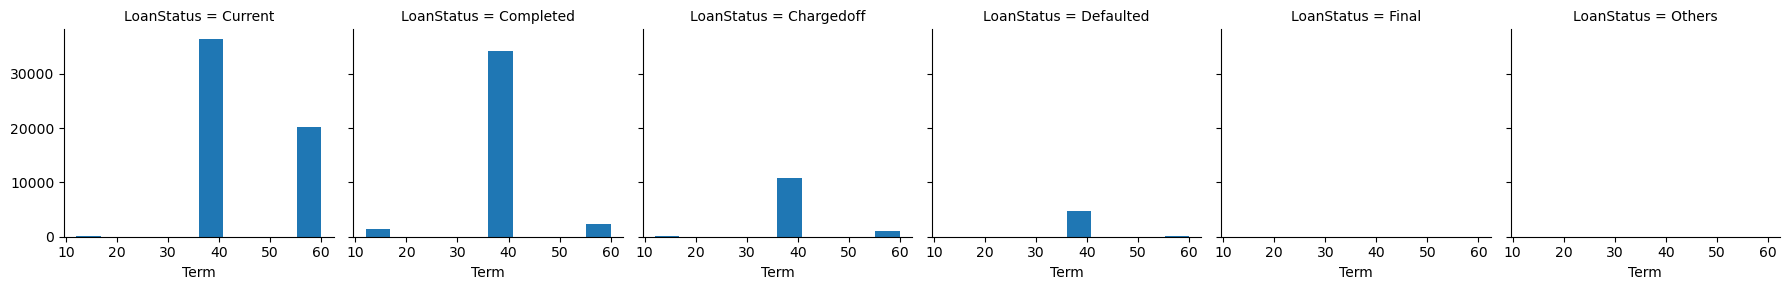

In [373]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'LoanStatus')
g.map(plt.hist, "Term")